# Student ID     : 2016003709
# Name             : 윤가영
<hr/>
# Context

## 1. Load data
## 2. PCA
## 3. Variation feature selection (Distplot, Clustering)
## 4. Model based feature selection (Distplot, Clustering)
## 5. ML (Decision Tree, KNN, Random Forest, Ensemble)
<hr/>

# 1. Load data
> Load and read the files in each path.

Because expr has data that 'genename' overlaps, i do a grouby and get the average of overlapping data for each 'genename'.
It also removes unnecessary NaN values later.

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats

file = r'/Users/yungayeong/Desktop/pbl3/breatcancer_expr.xls'
expr = pd.read_excel(file)
file = r'/Users/yungayeong/Desktop/pbl3/breatcancer_clinical.xls'
clin = pd.read_excel(file, index_col = 0)

expr = expr.groupby('genename').mean().reset_index()
expr = expr.set_index("genename").T

data = expr.join(clin['grade'])
data.dropna(axis=0, inplace=True)
data

,A1CF,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AAGAB,AAK1,AAMDC,...,ZSWIM8-AS1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYX,ZZEF1,grade
gsm282373,7.007432,10.712579,7.637957,5.909848,7.770600,8.656325,6.338495,8.111070,6.457576,8.923797,...,7.800831,8.017624,6.624565,10.277686,6.613293,5.074875,7.650478,9.730494,7.542637,2.0
gsm282374,6.964038,10.329075,7.453656,5.859004,8.139608,9.852725,6.212237,8.576381,6.271541,8.261238,...,7.617623,7.845650,5.958765,9.044446,6.608112,5.350543,7.986658,8.358708,7.754780,3.0
gsm282376,7.023772,10.637358,7.399219,6.058601,7.927259,8.181825,6.213901,8.115880,6.454017,9.078799,...,7.622595,8.054655,5.908229,10.279189,6.686177,5.257433,7.944653,9.013367,7.448073,2.0
gsm282378,6.489351,11.991671,7.087833,5.654459,7.882143,9.036149,5.969862,8.057966,6.218760,8.372226,...,7.377042,8.039769,7.860722,9.979379,6.113570,5.202280,7.536311,9.811798,7.213413,2.0
gsm282379,6.438389,11.231633,6.894447,5.692087,8.149540,9.082101,5.789997,8.206752,6.301628,8.541022,...,7.203314,7.527562,7.304223,10.461976,6.043028,5.031475,8.214397,9.243966,7.178299,2.0
gsm282380,6.604845,11.775257,7.036461,5.859075,7.837176,8.850813,5.936527,8.072461,6.184084,8.144439,...,7.258535,7.758455,7.331982,9.366516,6.125742,5.016859,8.250506,10.183277,7.404517,3.0
gsm282382,6.560573,12.194152,7.036815,5.910940,8.096396,8.363242,5.824736,8.219100,6.167408,8.886546,...,7.550096,7.566593,6.853563,8.647733,6.085258,5.045463,8.058778,9.361994,7.333342,1.0
gsm282383,6.596994,11.611710,6.537679,5.871129,7.936571,8.561116,5.998006,8.156066,6.254500,8.434103,...,7.342178,7.541280,7.501478,8.970825,6.174883,5.220046,7.705731,10.068213,7.304190,2.0
gsm282386,6.951380,10.755837,7.113007,5.917432,8.171364,9.219090,6.235046,8.868612,6.388327,9.296158,...,7.494390,7.806623,6.913037,9.645099,6.378709,5.516977,8.084950,9.204198,7.139062,2.0
gsm282391,6.391708,11.873336,6.770786,5.954395,7.745614,8.587583,6.063470,8.014133,6.207350,8.939011,...,7.484340,7.800584,7.406845,10.001438,5.849428,5.171999,7.819832,9.317028,6.992560,2.0


# 2. PCA
> PCA is to identify gene expression and correlation with breast cancer. Since the accuracy of the PCA randomization is much higher than the 33% accuracy, it is confirmed that this data has a high correlation.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

X = data.drop('grade',axis=1)
y = data['grade']

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

print('Training accuracy:', lr.score(X_train_pca, y_train))
print('Test accuracy:', lr.score(X_test_pca, y_test))

('Training accuracy:', 1.0)
('Test accuracy:', 0.5675675675675675)


# 3. Variation feature selection
## 3-1. Non-grouping feature selection
> Get the total variance and **smaller than the constant variation** datas' columns are removed.
This is equivalent to removing small differences from the average of each group's when dividing into groups later.

In [8]:
data_features = data.columns
avg_total_var = np.mean(np.var(data))
for feature in data_features:
    if(np.var(data[feature]) < avg_total_var and feature != 'grade'):
        data.pop(feature)

## 3-2. Grouping feature selection
> Now divide by each group and get the variance of each groups'. **bigger than the constant variation** datas' columns are removed.
This allows us to process data that is spread out from the average of each group, that is, useless data.


In [9]:
data_1 = data.loc[data['grade'] == 1.0]
data_2 = data.loc[data['grade'] == 2.0]
data_3 = data.loc[data['grade'] == 3.0]

In [10]:
var1 = np.var(data_1)
var2 = np.var(data_2)
var3 = np.var(data_3)

avg_var1 = np.mean(var1)
avg_var2 = np.mean(var2)
avg_var3 = np.mean(var3)

data_features = data.columns
for feature in data_features :
    if(np.var(data_1[feature]) >= avg_var1 or np.var(data_2[feature]) >= avg_var2 or np.var(data_3[feature]) >= avg_var3 and feature != 'grade'):
        data.pop(feature)

In [11]:
data

,A2M,AACS,AAMDC,AARS,ABCA3,ABCC5,ABCC6P2,ABCC8,ABCE1,ABCG1,...,ZNF580,ZNF587B,ZNF593,ZNF611,ZNF7,ZNF83,ZNF835,ZSCAN18,ZWILCH,grade
gsm282373,10.712579,8.656325,8.923797,9.490156,7.805668,8.431062,6.667639,7.202516,9.285371,6.887481,...,8.547668,7.029819,9.130198,9.142506,7.126024,5.861586,7.158853,7.944272,6.624565,2.0
gsm282374,10.329075,9.852725,8.261238,10.359410,8.731938,8.196288,5.976621,7.005499,9.191849,8.814673,...,8.701157,8.240614,8.831822,8.833270,6.887895,6.177963,7.289048,8.274802,5.958765,3.0
gsm282376,10.637358,8.181825,9.078799,9.441658,8.224137,8.856820,7.602218,8.141739,8.791568,7.701525,...,8.319841,7.461219,9.406383,9.274387,6.687568,6.444570,7.170303,8.368293,5.908229,2.0
gsm282378,11.991671,9.036149,8.372226,9.797713,7.959480,8.657302,7.506135,6.889179,9.119731,7.008087,...,8.542314,7.227225,8.902772,8.925336,7.090530,6.681353,6.789729,7.324846,7.860722,2.0
gsm282379,11.231633,9.082101,8.541022,10.445695,7.815701,9.635934,6.672355,7.016663,9.542197,8.172541,...,8.358629,6.902743,9.424904,8.920567,7.019793,6.906985,6.612982,8.397588,7.304223,2.0
gsm282380,11.775257,8.850813,8.144439,10.723490,7.921051,8.492500,7.313859,6.798340,9.297735,8.151845,...,7.926800,7.169840,9.295810,7.825340,6.547463,5.877660,6.739871,7.087710,7.331982,3.0
gsm282382,12.194152,8.363242,8.886546,9.845674,7.895353,7.685106,7.187020,8.344727,8.982088,6.748614,...,8.721568,7.801063,8.838997,9.818167,7.195711,8.370877,6.538950,8.871484,6.853563,1.0
gsm282383,11.611710,8.561116,8.434103,9.947967,7.589861,9.627398,6.224369,7.108573,8.988238,7.729723,...,8.453653,7.311578,9.093934,8.644805,7.222402,6.451717,6.923977,7.511196,7.501478,2.0
gsm282386,10.755837,9.219090,9.296158,9.799813,8.890231,9.208543,8.328125,6.912374,9.275162,7.549094,...,8.707762,7.313531,9.525543,8.833307,7.102046,6.387807,6.901755,7.716679,6.913037,2.0
gsm282391,11.873336,8.587583,8.939011,9.704500,8.394957,7.720288,6.516849,7.158769,8.840374,8.073442,...,8.435482,8.148022,9.204655,9.025236,6.641940,7.699525,6.876542,8.459221,7.406845,2.0


In [12]:
from sklearn.preprocessing import normalize 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline


## 3-3. Feature visualization
### 3-3.1 Distplot visualization
>Show displot how datas are processed. x axis means data, and y axis means frequency.I select three of data, and show

[u'PRKCZ', u'PRKDC', u'PRKRA']


/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

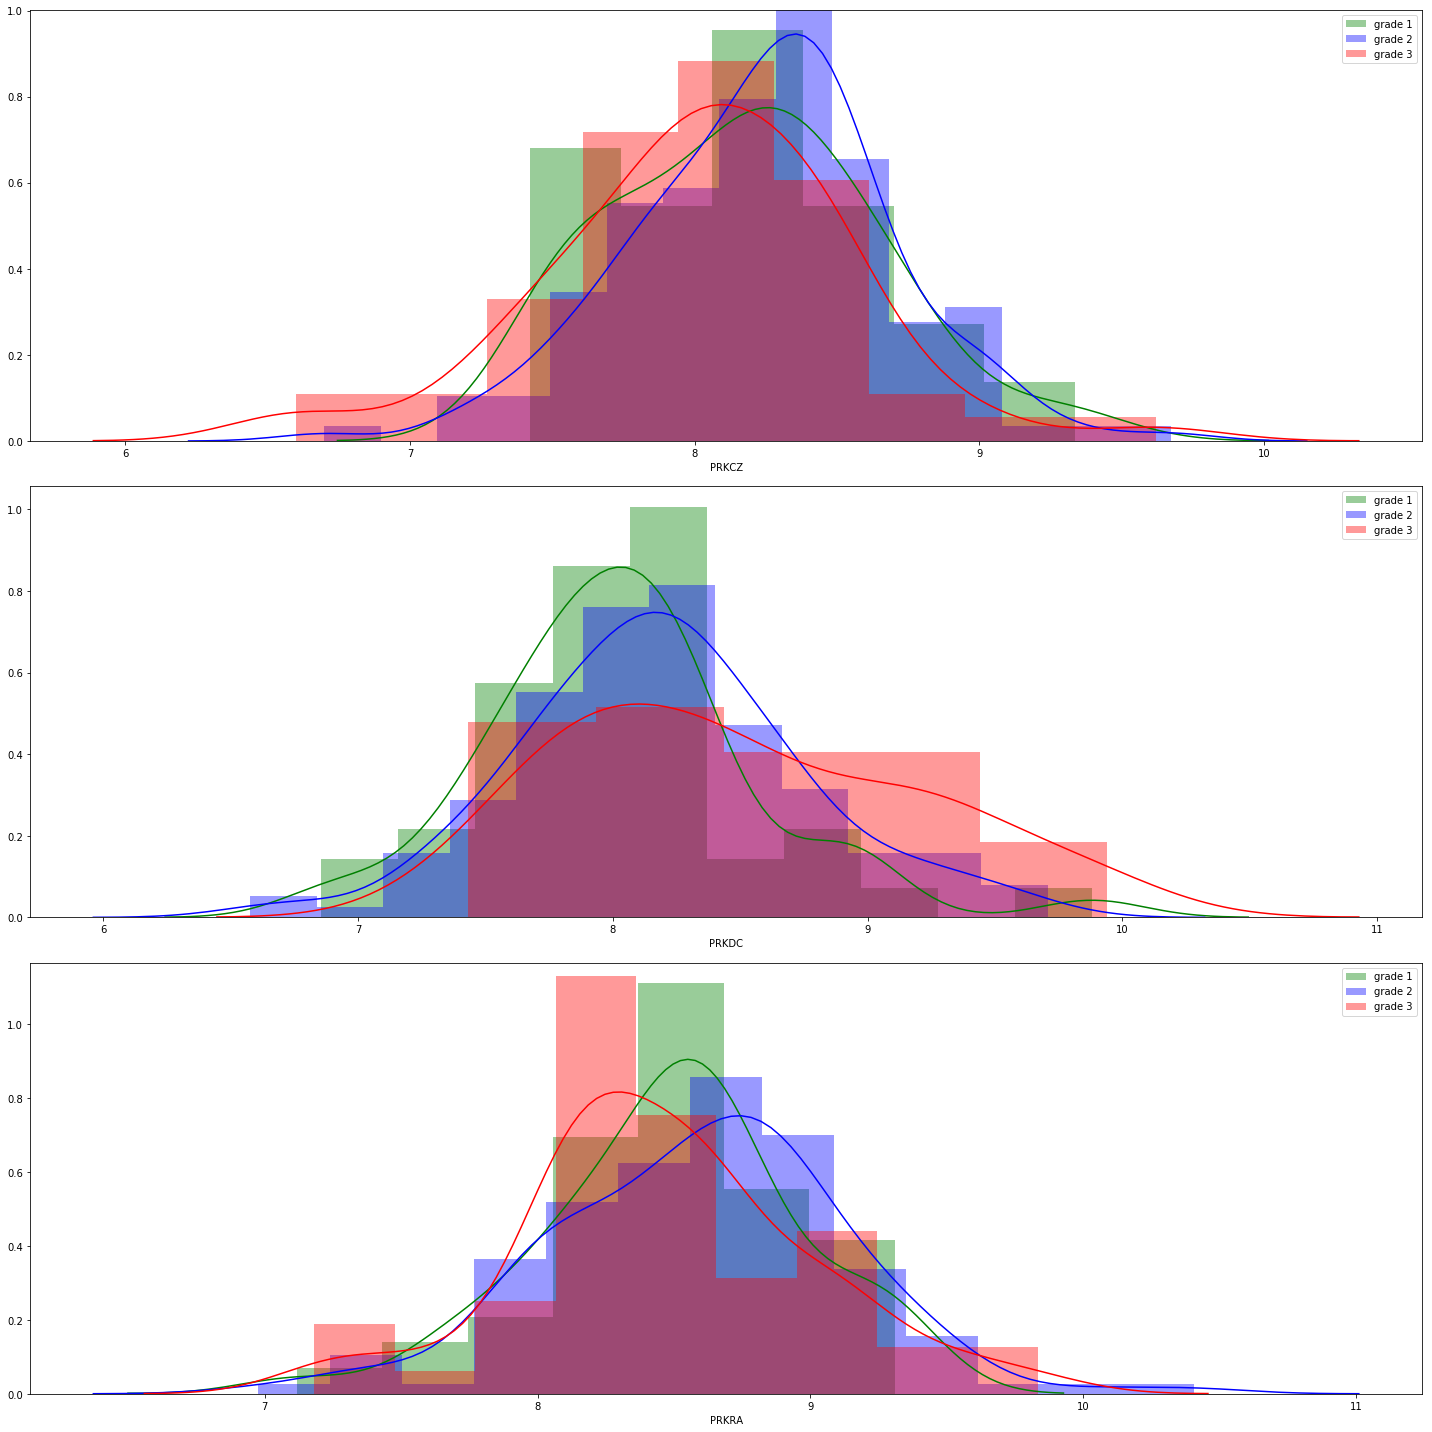

In [13]:
data_features = list(data.columns[1500:1503])
print(data_features)

bins = 12
plt.figure(figsize=(20,20))

for i,feature in enumerate(data_features):    
    plt.subplot(3,1, i+1)
    
    sns.distplot(data[data['grade'] == 1.0][feature], color = 'green', label = 'grade 1');
    sns.distplot(data[data['grade'] == 2.0][feature], color = 'blue', label = 'grade 2')
    sns.distplot(data[data['grade'] == 3.0][feature], color = 'red', label = 'grade 3')
    plt.legend(loc = "upper right")
    
plt.tight_layout()
plt.show()

### 3-3.2 Clustering visualization
> In order to scatter, the size of the x-coordinate must be the same as the size of the y-coordinate. To do this, we need to compare only the two types of genes, but I wanted to get a scatter of the whole data.
Although we did not learn from the class, I used tsne to create a pair of coordinates for the entire data,

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 246 samples in 0.020s...
[t-SNE] Computed neighbors for 246 samples in 0.282s...
[t-SNE] Computed conditional probabilities for sample 246 / 246
[t-SNE] Mean sigma: 9.161380
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.761192
[t-SNE] Error after 950 iterations: 0.527032


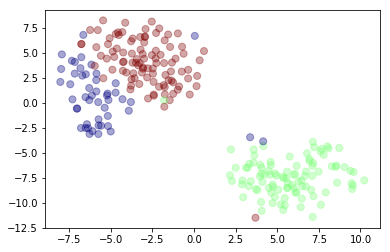

In [14]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs

X_plt = tol_data.drop('grade',axis=1)
X_plt = X_plt.values

from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X_plt)

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04)
y_km = km.fit_predict(X_plt)
plt.scatter(Y[:,0],Y[:,1],  c=y_km, cmap = "jet", alpha=0.35,s=50,label = y_km)

# 4. Model based feature selection

In [15]:
X = data.drop('grade',axis=1)
y = data['grade']

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [16]:
X_train_std = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_std = (X_test - np.mean(X_test)) / np.std(X_test)

print(X_train_std.shape,X_test_std.shape)

((172, 2219), (74, 2219))


## 4-1. Logistic Regression based feature selection
> Use logistic regression to reduce the number of features. The index of the highest accuracy for each model is obtained, and remove columns of the index if the index's weight is 0

In [17]:
print(X_train_std.shape, X_test_std.shape, y_train.shape, y_test.shape)
weights, params = [],[]
for c in np.arange(0., 10.):
    lr = LogisticRegression(solver='liblinear', penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    print('Test accuracy:', lr.score(X_test_std, y_test))
    weights.append(lr.coef_[1])
    params.append(10.**c)

((172, 2219), (74, 2219), (172,), (74,))
('Test accuracy:', 0.6351351351351351)
('Test accuracy:', 0.6351351351351351)
('Test accuracy:', 0.6621621621621622)
('Test accuracy:', 0.6216216216216216)
('Test accuracy:', 0.5945945945945946)
('Test accuracy:', 0.5675675675675675)
('Test accuracy:', 0.5675675675675675)
('Test accuracy:', 0.5675675675675675)
('Test accuracy:', 0.5675675675675675)
('Test accuracy:', 0.5675675675675675)


In [18]:
weights = np.array(weights) 
data_key = X_train_std.columns
for i in range(weights.shape[1]):
    if(weights[2][i] == 0):
        X_train_std.pop(data_key[i])
        X_test_std.pop(data_key[i])
print(X_train_std.shape, X_test_std.shape, y_train.shape, y_test.shape)

((172, 401), (74, 401), (172,), (74,))


** The number of features has been significantly reduced! **
### 4-1.1 Displot visualization
> Using the displot to identify the frequency of data reduced by logistic regression. I randomly selected only three of data

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

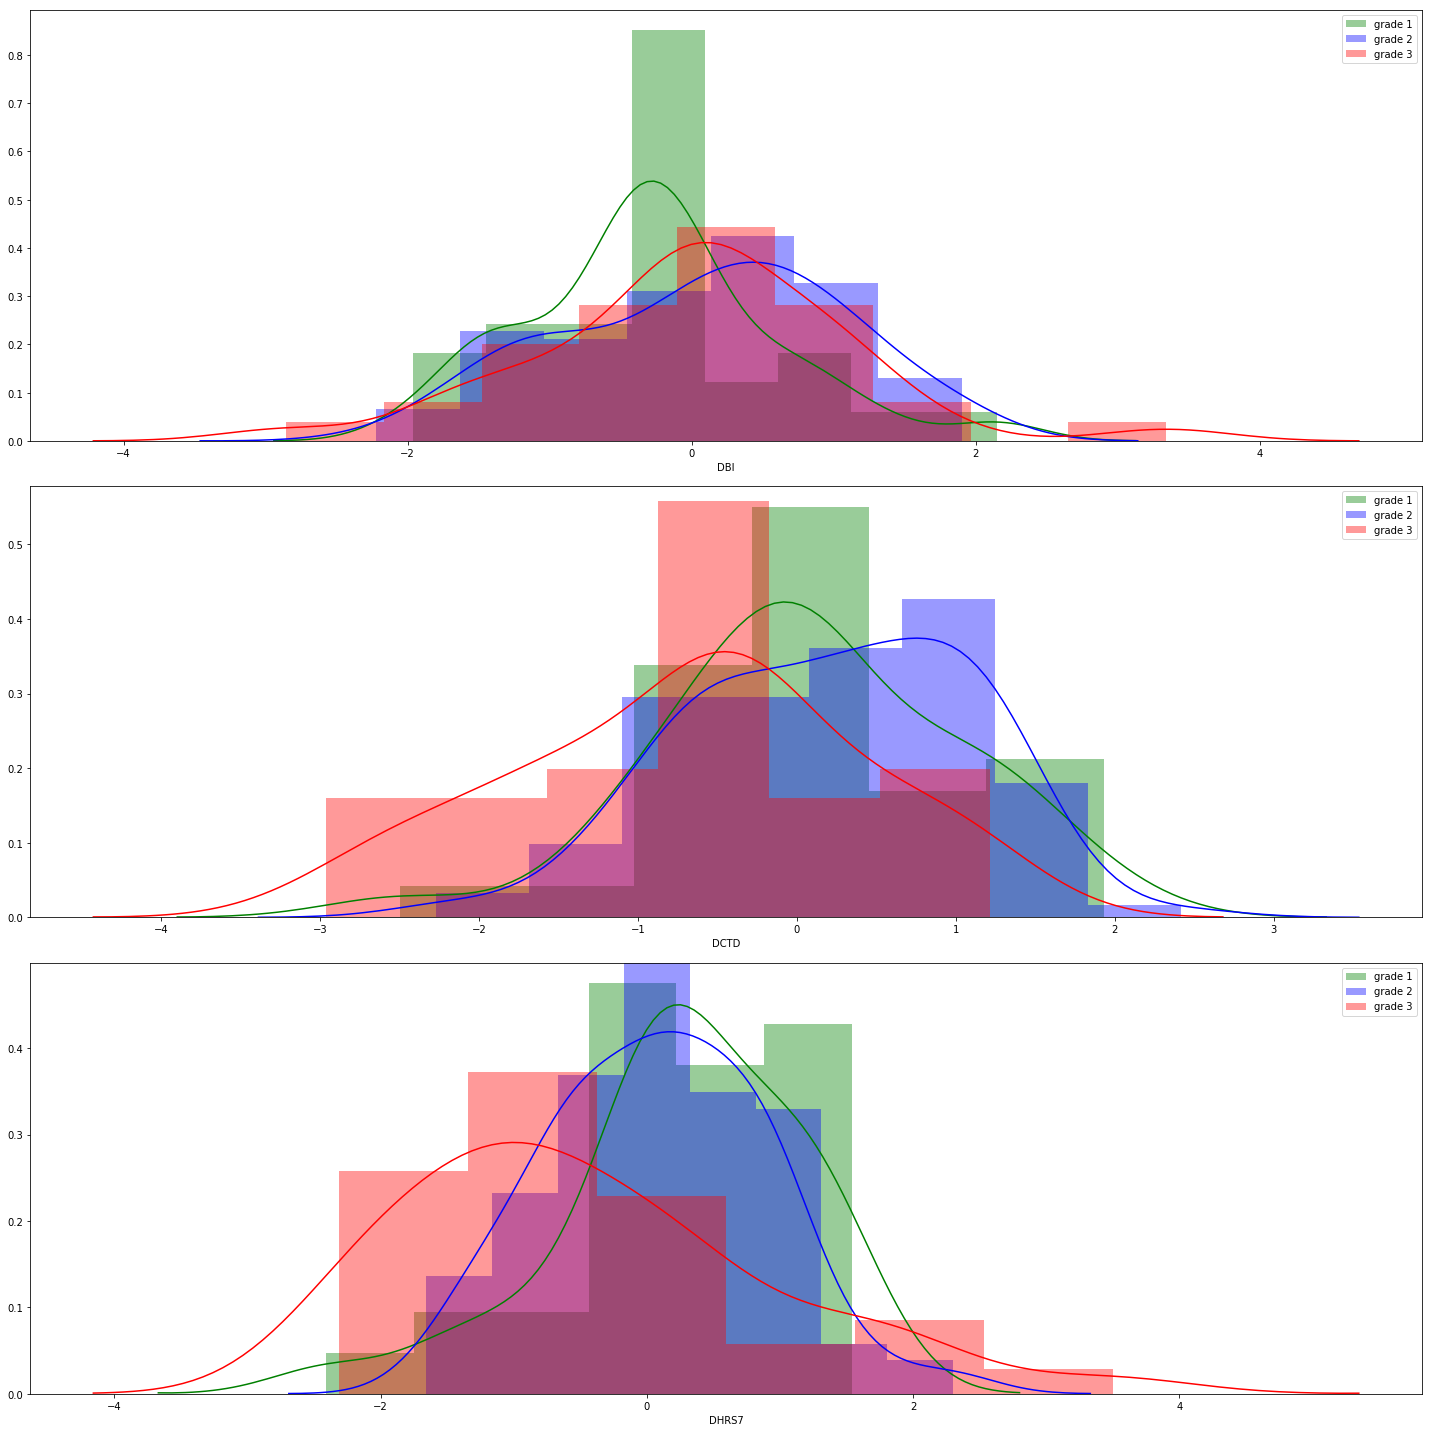

In [19]:
X_train_std_ = X_train_std.join(y_train)
X_train_std_
data_features = list(X_train_std_.columns[94:97])


bins = 12
plt.figure(figsize=(20,20))

for i,feature in enumerate(data_features):    
    plt.subplot(3,1, i+1)
    
    sns.distplot(X_train_std_[X_train_std_['grade'] == 1.0][feature], color = 'green', label = 'grade 1');
    sns.distplot(X_train_std_[X_train_std_['grade'] == 2.0][feature], color = 'blue', label = 'grade 2')
    sns.distplot(X_train_std_[X_train_std_['grade'] == 3.0][feature], color = 'red', label = 'grade 3')
    plt.legend(loc = "upper right")
    
plt.tight_layout()
plt.show()

### 4-1.2 Clustering visualization
> Comfirming the scattering of data reduced by logistic regression, and the method is same as shown in 3-3.2.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 172 samples in 0.000s...
[t-SNE] Computed neighbors for 172 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 172 / 172
[t-SNE] Mean sigma: 8.275052
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.351528
[t-SNE] Error after 800 iterations: 0.489379


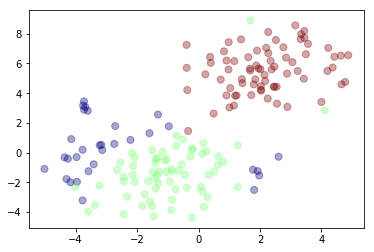

In [20]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs

X_plt = X_train_std.values

from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X_plt)

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04)
y_km = km.fit_predict(X_plt)
plt.scatter(Y[:,0],Y[:,1],  c=y_km, cmap = "jet", alpha=0.35,s=50,label = y_km)

## 4-2. SBS based feature selection
> Using SBS, processing the data once more

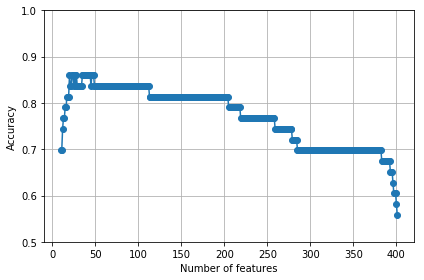

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone
from itertools import combinations

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features # desired no. of features
        self.test_size = test_size # validation set
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim)) # current subset of features
        self.subsets_ = [self.indices_] # history of subsets
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score] # history of scores

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):

        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

knn = KNeighborsClassifier(n_neighbors=2)

sbs = SBS(knn, k_features=10)
sbs.fit(np.array(X_train_std), y_train)

k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.5, 1.0])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [22]:
max_score = 0
max_index = 0
for i in range(len(sbs.scores_)):
    if(sbs.scores_[i] > max_score):
        max_score = sbs.scores_[i]
        max_index = i

In [23]:
print(max_score, max_index)

(0.8604651162790697, 353)


#### Delete the column of data that does not belong to the highest accuracy point.

In [24]:
sbs_result = sbs.subsets_[353]
data_key = X_train_std.columns

for i in range(X_train_std.shape[1]):
    if(i not in sbs_result):
        X_train_std.drop(data_key[i], axis=1, inplace=True)
        X_test_std.drop(data_key[i], axis=1, inplace=True)

In [25]:
X_train_std

,AACS,ABCC5,ABCC6P2,ABCC8,ABCG2,AC018512.1,AC055720.2,AC067930.7,AC073508.2,AC099329.1,...,BZW2,CCNG1,CD177,CEBPA,CLEC10A,CPM,CSAD,GPR65,GZMH,LONP2
gsm282524,-1.083733,-0.344525,-1.204426,0.046817,-0.333616,1.497328,-0.104967,-0.658539,0.467394,-0.057304,...,0.504281,-0.269636,1.403806,-0.709003,-0.502525,-1.271632,0.703537,0.325781,-0.325698,-0.929859
gsm282459,-0.263041,-1.107265,0.087716,2.155277,2.612907,0.653324,0.006409,-0.181186,-0.124126,-0.496798,...,0.284143,0.888535,-0.009106,-0.616674,0.015123,-0.828881,0.446448,-0.421141,-1.580354,0.352036
gsm282563,-1.269912,0.539569,0.024567,0.277404,0.191933,-0.704656,-0.390681,0.036583,0.971209,-0.957793,...,0.391770,-1.201029,-0.940488,0.138680,-0.539692,2.702169,-0.536872,0.660569,-0.817561,0.244556
gsm282512,-0.712046,1.188500,-0.669751,0.884913,-0.799509,1.203153,-0.366477,-2.361516,0.070184,-1.409435,...,0.026798,-1.410039,-0.281991,-0.146531,0.599911,-0.237163,1.013150,-0.655822,-0.162452,1.786278
gsm107113,1.049845,-0.387040,0.720852,-1.454496,-0.993686,0.222953,-0.792304,1.643975,0.576842,-0.907815,...,0.183382,-1.721704,-0.154851,0.061999,-0.611247,-0.215035,-1.695437,-0.370782,0.035697,-1.284227
gsm282557,0.169254,0.214075,0.479030,1.054820,-0.235013,1.043015,-0.788898,0.398671,0.760376,0.673286,...,-1.957921,1.247112,-0.144721,-0.474722,-0.793641,-0.933510,-0.449378,0.521411,-0.999705,-0.203548
gsm107148,-1.231396,2.325137,1.009026,-0.035391,-0.884579,-1.620331,0.374275,-0.630241,-0.420793,-0.776454,...,1.898286,-0.542680,-0.378706,1.521667,-0.867396,0.716749,1.288657,3.059153,-0.031817,1.006135
gsm107139,-0.653779,-0.090944,-0.500841,0.866029,0.029169,-1.213107,-0.005775,0.571060,-0.694255,-0.807375,...,-1.419446,-0.032067,0.429453,0.227881,-0.568068,-0.403197,-0.603584,-1.701590,0.996255,0.074077
gsm282439,0.470699,-0.444047,1.207777,1.799600,2.485604,-0.011241,0.431670,-1.051670,0.581319,2.047493,...,-0.468040,0.586025,0.156128,0.174214,-0.290119,-0.265944,0.328827,-0.344571,-1.235844,-0.623426
gsm282454,0.160402,-0.193194,-1.063815,-0.040060,-0.023925,1.421941,-0.097375,-0.255167,-0.946470,-0.621289,...,0.805680,-0.915947,-0.013439,-0.129283,-0.243460,-1.137343,-1.378198,0.896669,-0.487019,-2.068829


** The number of features has really really decreased! **

### 4-2.1 Clustering visualization
> I used distplot before, but the reason I did not use is because of the small number of columns. It was judged to be meaningless. Clustering is done in the same way as 3-3.2.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 172 samples in 0.000s...
[t-SNE] Computed neighbors for 172 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 172 / 172
[t-SNE] Mean sigma: 3.136100
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.174328
[t-SNE] Error after 900 iterations: 0.661834


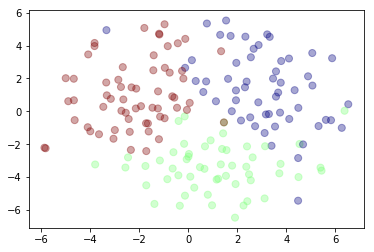

In [27]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs

X_plt = X_train_std.values

from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X_plt)

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04)
y_km = km.fit_predict(X_plt)
plt.scatter(Y[:,0],Y[:,1],  c=y_km, cmap = "jet", alpha=0.35,s=50,label = y_km)

# 5. ML
## 5-1. Decision tree
> Use the Decision Tree with the processed data to get the accuracy. I used confusion_matrix intentionally, and I can see the classified (predicted) state. The more diagonal the color is darker, the more the number is bigger, it is good classification. Unfortunately, the accuracy was low, and confusion_matrix showed many things were misclassified.

('Training accuracy:', 0.686046511627907)
('Test accuracy:', 0.527027027027027)
Confusion matrix, without normalization
[[ 0 14  0]
 [ 0 38  4]
 [ 0 17  1]]


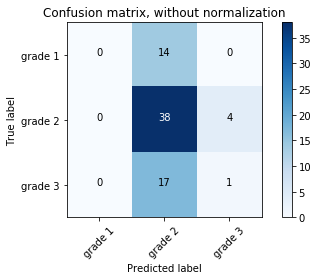

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import itertools

tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
y_pred = tree.fit(X_train_std, y_train).predict(X_test_std)

print('Training accuracy:', tree.score(np.array(X_train_std), y_train))
print('Test accuracy:', tree.score(np.array(X_test_std), y_test))

class_names = ['grade 1','grade 2','grade 3']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision = 3)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

## 5-2. KNN
> Use the KNN with the processed data to get the accuracy. Use confusion_matrix in the same way as 5-1.

('Training accuracy:', 0.7732558139534884)
('Test accuracy:', 0.5135135135135135)
Confusion matrix, without normalization
[[ 9  5  0]
 [14 27  1]
 [ 2 14  2]]


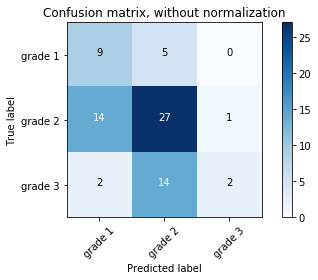

In [29]:
y_pred = knn.fit(X_train_std, y_train).predict(X_test_std)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision = 3)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()



## 5-3. RandomForest
> Use the randomforest with the processed data to get the accuracy. Use confusion_matrix in the same way as 5-1.
...it seems to be overfitting very much.

('Training accuracy:', 0.9941860465116279)
('Test accuracy:', 0.6351351351351351)
Confusion matrix, without normalization
[[ 3 11  0]
 [ 3 38  1]
 [ 1 11  6]]


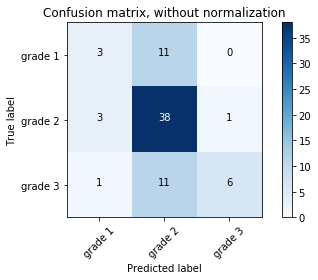

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2, random_state=1)
rf.fit(X_train_std,y_train)
y_pred = rf.predict(X_test_std)

print('Training accuracy:', rf.score(X_train_std, y_train))
print('Test accuracy:', rf.score(X_test_std, y_test))

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision = 3)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

## 5-4. Ensemble
> Use the ensemble with the processed data to get the accuracy. As 5-1., 5-2., 5-3., and majority vote models, the accuracy of each model was obtained.

In [31]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))


        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf2 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')
clf3 = RandomForestClassifier(criterion='entropy', n_estimators = 50, n_jobs=2,random_state=1)

mv_clf = MajorityVoteClassifier(classifiers=[clf1, clf2, clf3])

clf_labels = ['Decision Tree', 'KNN', 'RandomForest','Majority Voting']
all_clf = [clf1, clf2, clf3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_std,
                             y=y_train,
                             cv=10)
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


ROC AUC: 0.59 (+/- 0.07) [Decision Tree]
ROC AUC: 0.61 (+/- 0.09) [KNN]
ROC AUC: 0.67 (+/- 0.07) [RandomForest]


/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

ROC AUC: 0.65 (+/- 0.07) [Majority Voting]


/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
